# 导入机器学习以及数据处理库


In [3]:
from autogluon.tabular import TabularDataset , TabularPredictor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from d2l import torch as d2l

# 数据导入

In [3]:
df = pd.read_excel(r"C:\Users\23174\Desktop\GitHub项目\毕设\MachineLearningOER\数据\四元数据添加Composition特征.xlsx")
df = df.drop(["Ni", "Fe", "Co", "Ce","3mA cm‐2 ", "formula", "composition"], axis=1)
df 

,10 mA cm‐2,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,441,28,28,0,28.000000,0.000000,28,61,61,0,...,0.000000,0.595395,0.000000,0.595395,225,225,0,225.000000,0.000000e+00,225
1,426,26,28,2,27.938000,0.120156,28,55,61,6,...,1.515268,0.642368,0.091034,0.595395,225,229,4,225.124000,2.403120e-01,225
2,423,27,28,1,27.969000,0.060078,28,58,61,3,...,0.953076,0.624940,0.057259,0.595395,194,225,31,224.039000,1.862418e+00,225
3,420,26,28,2,27.858000,0.263836,28,55,61,6,...,1.515268,0.702979,0.199891,0.595395,225,229,4,225.284000,5.276720e-01,225
4,422,26,28,2,27.906155,0.175947,28,55,61,6,...,1.515268,0.672608,0.144766,0.595395,194,229,35,224.155399,1.886614e+00,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5325,463,26,58,32,52.124117,9.486794,58,15,61,46,...,2.110663,0.191967,0.309936,0.000000,194,229,35,199.130172,8.603779e+00,194
5326,470,27,58,31,51.969000,9.649600,58,15,61,46,...,1.548471,0.148624,0.237799,0.000000,194,225,31,199.239000,8.707218e+00,194
5327,464,27,58,31,54.869000,5.623276,58,15,61,46,...,1.548471,0.128399,0.230604,0.000000,194,225,31,194.961000,1.862418e+00,194
5328,458,26,58,32,54.807000,5.734628,58,15,58,43,...,2.110663,0.175372,0.314968,0.000000,194,229,35,195.085000,2.102730e+00,194


In [4]:
df.describe()

,10 mA cm‐2,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
count,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,...,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,420.641463,26.094559,55.292308,29.197749,34.567314,9.070930,34.120450,18.620263,60.728705,42.108443,...,1.996328,1.071003,0.611667,1.045309,194.175235,228.490056,34.314822,210.624781,12.842969,210.118949
std,13.120612,0.308855,8.608110,8.604851,6.137641,5.046594,13.079464,11.511165,0.898875,11.523661,...,0.271010,0.380923,0.185906,0.816060,2.329989,2.659651,3.517154,7.809427,3.927678,16.540610
min,390.000000,26.000000,26.000000,0.000000,26.000000,0.000000,26.000000,15.000000,55.000000,0.000000,...,0.000000,0.100622,0.000000,0.000000,194.000000,194.000000,0.000000,194.000000,0.000000,194.000000
25%,411.000000,26.000000,58.000000,32.000000,29.586610,4.151714,26.000000,15.000000,61.000000,46.000000,...,2.110663,0.790734,0.488869,0.000000,194.000000,229.000000,35.000000,204.527888,10.745600,194.000000
50%,419.000000,26.000000,58.000000,32.000000,33.245902,9.899436,27.000000,15.000000,61.000000,46.000000,...,2.110663,1.070918,0.623589,0.595395,194.000000,229.000000,35.000000,210.579681,14.286482,194.000000
75%,429.000000,26.000000,58.000000,32.000000,38.500000,13.807026,28.000000,15.000000,61.000000,46.000000,...,2.110663,1.351255,0.746218,1.548471,194.000000,229.000000,35.000000,216.681000,15.818797,225.000000
max,470.000000,28.000000,58.000000,32.000000,54.869000,16.000000,58.000000,61.000000,61.000000,46.000000,...,2.110663,2.110663,1.055331,2.110663,229.000000,229.000000,35.000000,229.000000,17.500000,229.000000


In [5]:
df.describe().to_excel("describe.xlsx")

In [6]:
df.describe().shape

(8, 133)

In [7]:
df.mean()

10 mA cm‐2                             420.641463
MagpieData minimum Number               26.094559
MagpieData maximum Number               55.292308
MagpieData range Number                 29.197749
MagpieData mean Number                  34.567314
                                          ...    
MagpieData maximum SpaceGroupNumber    228.490056
MagpieData range SpaceGroupNumber       34.314822
MagpieData mean SpaceGroupNumber       210.624781
MagpieData avg_dev SpaceGroupNumber     12.842969
MagpieData mode SpaceGroupNumber       210.118949
Length: 133, dtype: float64

# 模型使用
😊😒😂😂-。- ， 应该是选取最优的参数用于做灵敏度分析的，这里有点问题。 先用f折交叉验证的模型先做吧。

In [6]:
# 导入模型
label = "10 mA cm‐2 "
save = "四元组分10mAcm-2添加formula特征回归 10折 交叉验证"
predictor = TabularPredictor.load(save)
predictor

In [9]:
mean_value  = pd.DataFrame(df.mean().copy(), ).T
mean_value

,10 mA cm‐2,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,420.641463,26.094559,55.292308,29.197749,34.567314,9.07093,34.12045,18.620263,60.728705,42.108443,...,1.996328,1.071003,0.611667,1.045309,194.175235,228.490056,34.314822,210.624781,12.842969,210.118949


In [10]:
mean_value_nolabel = mean_value.drop(columns = [label])
mean_value_nolabel.head()
predictor.predict(mean_value_nolabel)

c:\Users\23174\anaconda3\envs\pytorch\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\23174\anaconda3\envs\pytorch\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0    415.785431
Name: 10 mA cm‐2 , dtype: float32

In [11]:
mean_value_nolabel.columns

Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'MagpieData range GSmagmom', 'MagpieData mean GSmagmom',
       'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom',
       'MagpieData minimum SpaceGroupNumber',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber'],
      dtype='object', length=132)

In [12]:
mean_value_nolabel['MagpieData minimum Number'] = 1

选取特征中的平均值作为基础，然后以研究变量作为变量来研究和过电位之间的关系来做灵敏度分析。

In [13]:
class featureSensitiveAnalysis:
    def __init__(self, model, feature_name:str, mean_feature_df:pd.DataFrame) -> None:
        # 灵敏度特征选取
        self.model = model
        self.feature_name = feature_name
        self.mean_feature_df = mean_feature_df
        self.mean_feature_value = mean_feature_df[feature_name]

    def change_feature_value(self, value:float) -> None:
        self.mean_feature_df[self.feature_name] = value
    
    def get_mean_feature_value(self) -> float:
        return self.mean_feature_value
        
    def get_predict_op_value(self) -> float:
        mean_value_nolabel = self.mean_feature_df.drop(columns = ["10 mA cm‐2 "])
        return self.model.predict(mean_value_nolabel)

    
    

In [32]:
feature_name_list = ["MagpieData mean GSmagmom", "MagpieData mean SpaceGroupNumber", "MagpieData avg_dev GSmagmom", "MagpieData mean NValence", "MagpieData avg_dev SpaceGroupNumber"]

In [39]:
feature_range_list = []
op_range_list = []
featureSA = featureSensitiveAnalysis(model=predictor, feature_name=feature_name_list[0], mean_feature_df=mean_value.copy())
x = np.arange(0, 3, 0.1)
op_list = []
for i in x:
    # print(i)
    featureSA.change_feature_value(i)
    op_list.append(featureSA.get_predict_op_value())
feature_range_list.append(x)
op_range_list.append(op_list)

featureSA = featureSensitiveAnalysis(model=predictor, feature_name=feature_name_list[1], mean_feature_df=mean_value.copy())
x = np.arange(1, 231, 1) # 空间群数1到231
op_list = []
for i in x:
    # print(i)
    featureSA.change_feature_value(i)
    op_list.append(featureSA.get_predict_op_value())
feature_range_list.append(x)
op_range_list.append(op_list)

featureSA = featureSensitiveAnalysis(model=predictor, feature_name=feature_name_list[2], mean_feature_df=mean_value.copy())
x = np.arange(0, 2, 0.02) 
op_list = []
for i in x:
    # print(i)
    featureSA.change_feature_value(i)
    op_list.append(featureSA.get_predict_op_value())
    
feature_range_list.append(x)
op_range_list.append(op_list)


featureSA = featureSensitiveAnalysis(model=predictor, feature_name=feature_name_list[3], mean_feature_df=mean_value.copy())
x = np.arange(0, 10, 0.1) 
op_list = []
for i in x:
    # print(i)
    featureSA.change_feature_value(i)
    op_list.append(featureSA.get_predict_op_value())
feature_range_list.append(x)
op_range_list.append(op_list)


featureSA = featureSensitiveAnalysis(model=predictor, feature_name=feature_name_list[4], mean_feature_df=mean_value.copy())
x = np.arange(0, 20, 1) 
op_list = []
for i in x:
    # print(i)
    featureSA.change_feature_value(i)
    op_list.append(featureSA.get_predict_op_value())
feature_range_list.append(x)
op_range_list.append(op_list)


In [55]:
feature_name_list

['MagpieData mean GSmagmom',
 'MagpieData mean SpaceGroupNumber',
 'MagpieData avg_dev GSmagmom',
 'MagpieData mean NValence',
 'MagpieData avg_dev SpaceGroupNumber']

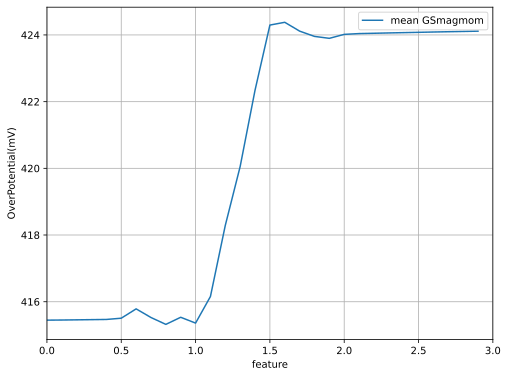

In [76]:
d2l.plot([feature_range_list[0]],
        [op_range_list[0] ] , 'feature',
         'OverPotential(mV)', legend=["mean GSmagmom"],
         xlim=[0, 3], figsize=(8, 6))
plt.savefig("mean GSmagmom 灵敏度分析", dpi=300)

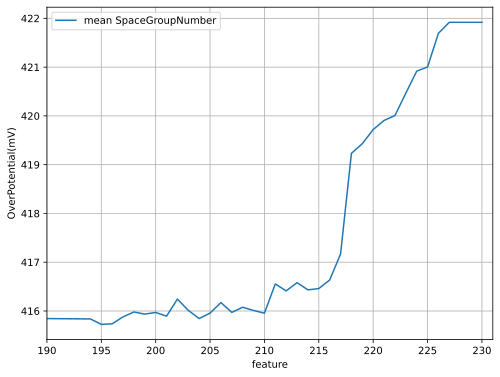

In [77]:
d2l.plot([feature_range_list[1]],
        [op_range_list[1] ] , 'feature',
         'OverPotential(mV)', legend=["mean SpaceGroupNumber"],
         xlim=[190, 231], figsize=(8, 6))
plt.savefig("mean SpaceGroupNumber 灵敏度分析", dpi=300)

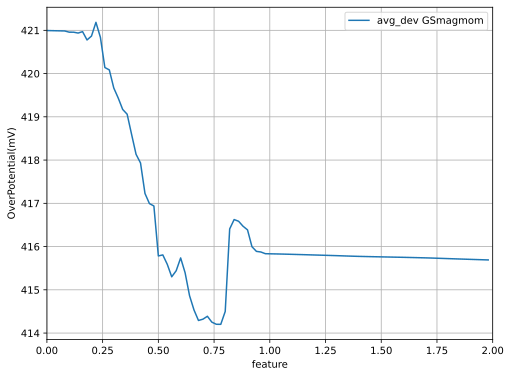

In [78]:
d2l.plot([feature_range_list[2]],
        [op_range_list[2] ] , 'feature',
         'OverPotential(mV)', legend=["avg_dev GSmagmom"],
         xlim=[0, 2], figsize=(8, 6))
plt.savefig("avg_dev GSmagmom 灵敏度分析", dpi=300)

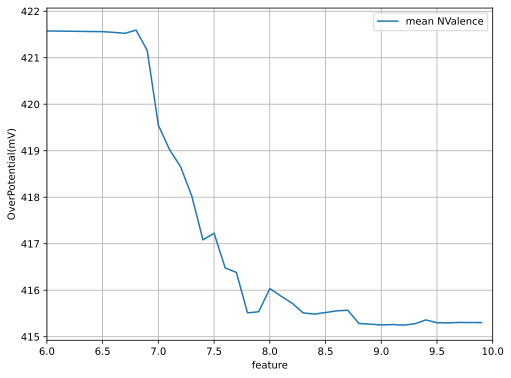

In [79]:
d2l.plot([feature_range_list[3]],
        [op_range_list[3] ] , 'feature',
         'OverPotential(mV)', legend=["mean NValence"],
         xlim=[6, 10], figsize=(8, 6))
plt.savefig("mean NValence 灵敏度分析", dpi=300)

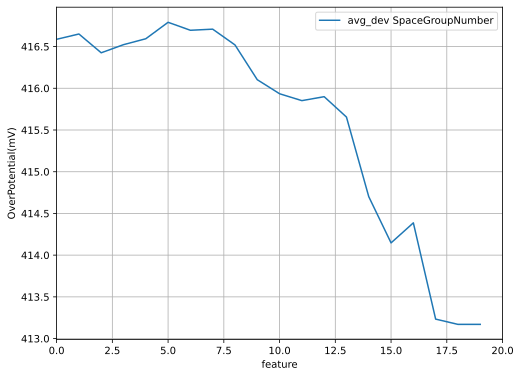

In [80]:
d2l.plot([feature_range_list[4]],
        [op_range_list[4] ] , 'feature',
         'OverPotential(mV)', legend=["avg_dev SpaceGroupNumber"],
         xlim=[0, 20], figsize=(8, 6)) #
plt.savefig("avg_dev SpaceGroupNumber 灵敏度分析", dpi=300)

# NiCoFe三元相图

In [92]:
import plotly.figure_factory as ff
import numpy as np
a, b = np.mgrid[0:1:30j, 0:1:20j]
mask = a + b <= 1
a, b = a[mask], b[mask]
c = 1-a-b
d = 0*c
ternay_Data = pd.DataFrame({"Ni":a, "Co":b, "Fe":c, "Ce": d})
df = ternay_Data.copy()
df["formula"] = 1
df


,Ni,Co,Fe,Ce,formula
0,0.000000,0.000000,1.000000,0.0,1
1,0.000000,0.052632,0.947368,0.0,1
2,0.000000,0.105263,0.894737,0.0,1
3,0.000000,0.157895,0.842105,0.0,1
4,0.000000,0.210526,0.789474,0.0,1
...,...,...,...,...,...
296,0.896552,0.052632,0.050817,0.0,1
297,0.931034,0.000000,0.068966,0.0,1
298,0.931034,0.052632,0.016334,0.0,1
299,0.965517,0.000000,0.034483,0.0,1


In [93]:
for index, row in df.iterrows():
    ni_fraction = row["Ni"]
    fe_fraction = row["Fe"]
    co_fraction = row["Co"]
    ce_fraction = row["Ce"]
    conte = f"Ni{ni_fraction}Fe{fe_fraction}Co{co_fraction}Ce{ce_fraction}"
    row.loc["formula"] = conte
    df.iloc[index] = row
    #print() # 输出每行的索引值

In [94]:
df.head()

,Ni,Co,Fe,Ce,formula
0,0.0,0.000000,1.000000,0.0,Ni0.0Fe1.0Co0.0Ce0.0
1,0.0,0.052632,0.947368,0.0,Ni0.0Fe0.9473684210526316Co0.05263157894736842...
2,0.0,0.105263,0.894737,0.0,Ni0.0Fe0.8947368421052632Co0.10526315789473684...
3,0.0,0.157895,0.842105,0.0,Ni0.0Fe0.8421052631578947Co0.15789473684210525...
4,0.0,0.210526,0.789474,0.0,Ni0.0Fe0.7894736842105263Co0.21052631578947367...


In [95]:
%%time
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()

StrToComposition:   0%|          | 0/301 [00:00<?, ?it/s]

CPU times: total: 31.2 ms
Wall time: 3.09 s


,Ni,Co,Fe,Ce,formula,composition
0,0.0,0.000000,1.000000,0.0,Ni0.0Fe1.0Co0.0Ce0.0,(Fe)
1,0.0,0.052632,0.947368,0.0,Ni0.0Fe0.9473684210526316Co0.05263157894736842...,"(Fe, Co)"
2,0.0,0.105263,0.894737,0.0,Ni0.0Fe0.8947368421052632Co0.10526315789473684...,"(Fe, Co)"
3,0.0,0.157895,0.842105,0.0,Ni0.0Fe0.8421052631578947Co0.15789473684210525...,"(Fe, Co)"
4,0.0,0.210526,0.789474,0.0,Ni0.0Fe0.7894736842105263Co0.21052631578947367...,"(Fe, Co)"


In [96]:
%%time
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizer
df.head()

ElementProperty:   0%|          | 0/301 [00:00<?, ?it/s]

CPU times: total: 62.5 ms
Wall time: 10.5 s


,Ni,Co,Fe,Ce,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,0.0,0.000000,1.000000,0.0,Ni0.0Fe1.0Co0.0Ce0.0,(Fe),26.0,26.0,0.0,26.000000,...,0.000000,2.110663,0.000000,2.110663,229.0,229.0,0.0,229.000000,0.000000,229.0
1,0.0,0.052632,0.947368,0.0,Ni0.0Fe0.9473684210526316Co0.05263157894736842...,"(Fe, Co)",26.0,27.0,1.0,26.052632,...,0.562192,2.081074,0.056063,2.110663,194.0,229.0,35.0,227.157895,3.490305,229.0
2,0.0,0.105263,0.894737,0.0,Ni0.0Fe0.8947368421052632Co0.10526315789473684...,"(Fe, Co)",26.0,27.0,1.0,26.105263,...,0.562192,2.051485,0.105898,2.110663,194.0,229.0,35.0,225.315789,6.592798,229.0
3,0.0,0.157895,0.842105,0.0,Ni0.0Fe0.8421052631578947Co0.15789473684210525...,"(Fe, Co)",26.0,27.0,1.0,26.157895,...,0.562192,2.021896,0.149502,2.110663,194.0,229.0,35.0,223.473684,9.307479,229.0
4,0.0,0.210526,0.789474,0.0,Ni0.0Fe0.7894736842105263Co0.21052631578947367...,"(Fe, Co)",26.0,27.0,1.0,26.210526,...,0.562192,1.992307,0.186878,2.110663,194.0,229.0,35.0,221.631579,11.634349,229.0


In [98]:
df_mole_OP = df.drop(['Ni', 'Fe', 'Co', 'Ce'], axis=1)

In [100]:
e = np.array(predictor.predict(df_mole_OP).values)
for color in ['Picnic']:#['Blackbody','Bluered','Blues','Cividis',
    #'Earth','Electric','Greens','Greys','Hot','Jet','Picnic','Portland','Rainbow','RdBu','Reds','Viridis','YlGnBu','YlOrRd']:
    fig = ff.create_ternary_contour(np.array([b, c, a]), e,
                                    pole_labels=[ 'Co', 'Fe','Ni'],
                                    interp_mode='cartesian',
                                    ncontours=10,
                                    showscale=True,
                                    colorscale=color ,
                                    title='Predicted overpotential(mv)',
                                )
    fig.show()

# CoFeCe 相图

In [101]:
import plotly.figure_factory as ff
import numpy as np
a, b = np.mgrid[0:1:30j, 0:1:20j]
mask = a + b <= 1
a, b = a[mask], b[mask]
c = 1-a-b
d = 0*c
ternay_Data = pd.DataFrame({"Ce":a, "Co":b, "Fe":c, "Ni": d})
df = ternay_Data.copy()
df["formula"] = 1
df
for index, row in df.iterrows():
    ni_fraction = row["Ce"]
    fe_fraction = row["Fe"]
    co_fraction = row["Co"]
    ce_fraction = row["Ni"]
    conte = f"Ce{ni_fraction}Fe{fe_fraction}Co{co_fraction}Ni{ce_fraction}"
    row.loc["formula"] = conte
    df.iloc[index] = row
    #print() # 输出每行的索引值
df.head()
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizer
df.head()
df_mole_OP = df.drop(['Ce', 'Fe', 'Co', 'Ni'], axis=1)
e = np.array(predictor.predict(df_mole_OP).values)
for color in ['Picnic']:#['Blackbody','Bluered','Blues','Cividis',
    #'Earth','Electric','Greens','Greys','Hot','Jet','Picnic','Portland','Rainbow','RdBu','Reds','Viridis','YlGnBu','YlOrRd']:
    fig = ff.create_ternary_contour(np.array([b, c, a]), e,
                                    pole_labels=[ 'Co', 'Fe','Ce'],
                                    interp_mode='cartesian',
                                    ncontours=10,
                                    showscale=True,
                                    colorscale=color ,
                                    title='Predicted overpotential(mv)',
                                )
    fig.show()

StrToComposition:   0%|          | 0/301 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/301 [00:00<?, ?it/s]

# NiCoCe 相图

In [102]:
import plotly.figure_factory as ff
import numpy as np
a, b = np.mgrid[0:1:30j, 0:1:20j]
mask = a + b <= 1
a, b = a[mask], b[mask]
c = 1-a-b
d = 0*c
ternay_Data = pd.DataFrame({"Ce":a, "Co":b, "Ni":c, "Fe": d})
df = ternay_Data.copy()
df["formula"] = 1
df
for index, row in df.iterrows():
    ni_fraction = row["Ce"]
    fe_fraction = row["Ni"]
    co_fraction = row["Co"]
    ce_fraction = row["Fe"]
    conte = f"Ce{ni_fraction}Ni{fe_fraction}Co{co_fraction}Fe{ce_fraction}"
    row.loc["formula"] = conte
    df.iloc[index] = row
    #print() # 输出每行的索引值
df.head()
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizer
df.head()
df_mole_OP = df.drop(['Ce', 'Ni', 'Co', 'Fe'], axis=1)
e = np.array(predictor.predict(df_mole_OP).values)
for color in ['Picnic']:#['Blackbody','Bluered','Blues','Cividis',
    #'Earth','Electric','Greens','Greys','Hot','Jet','Picnic','Portland','Rainbow','RdBu','Reds','Viridis','YlGnBu','YlOrRd']:
    fig = ff.create_ternary_contour(np.array([b, c, a]), e,
                                    pole_labels=[ 'Co', 'Ni','Ce'],
                                    interp_mode='cartesian',
                                    ncontours=10,
                                    showscale=True,
                                    colorscale=color ,
                                    title='Predicted overpotential(mv)',
                                )
    fig.show()

StrToComposition:   0%|          | 0/301 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/301 [00:00<?, ?it/s]

# NiFeCe 相图

In [104]:
import plotly.figure_factory as ff
import numpy as np
a, b = np.mgrid[0:1:30j, 0:1:20j]
mask = a + b <= 1
a, b = a[mask], b[mask]
c = 1-a-b
d = 0*c
ternay_Data = pd.DataFrame({"Ce":a, "Fe":b, "Ni":c, "Co": d})
df = ternay_Data.copy()
df["formula"] = 1
df
for index, row in df.iterrows():
    ni_fraction = row["Ce"]
    fe_fraction = row["Ni"]
    co_fraction = row["Fe"]
    ce_fraction = row["Co"]
    conte = f"Ce{ni_fraction}Ni{fe_fraction}Fe{co_fraction}Co{ce_fraction}"
    row.loc["formula"] = conte
    df.iloc[index] = row
    #print() # 输出每行的索引值
df.head()
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizer
df.head()
df_mole_OP = df.drop(['Ce', 'Ni', 'Fe', 'Co'], axis=1)
e = np.array(predictor.predict(df_mole_OP).values)
for color in ['Picnic']:#['Blackbody','Bluered','Blues','Cividis',
    #'Earth','Electric','Greens','Greys','Hot','Jet','Picnic','Portland','Rainbow','RdBu','Reds','Viridis','YlGnBu','YlOrRd']:
    fig = ff.create_ternary_contour(np.array([b, c, a]), e,
                                    pole_labels=[ 'Fe', 'Ni','Ce'],
                                    interp_mode='cartesian',
                                    ncontours=10,
                                    showscale=True,
                                    colorscale=color ,
                                    title='Predicted overpotential(mv)',
                                )
    fig.show()

StrToComposition:   0%|          | 0/301 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/301 [00:00<?, ?it/s]

# 在四元组分中搜索过电位最低的数据！

In [25]:
import plotly.figure_factory as ff
import numpy as np
a, b, c  = np.mgrid[0:1:50j, 0:1:50j, 0:1:50j]
mask = a + b + c <= 1
a, b, c = a[mask], b[mask], c[mask]
d = 1 - a - b - c
ternay_Data = pd.DataFrame({"Ce":a, "Fe":b, "Ni":c, "Co": d})
df = ternay_Data.copy()
df["formula"] = 1
df
for index, row in df.iterrows():
    ni_fraction = row["Ce"]
    fe_fraction = row["Ni"]
    co_fraction = row["Fe"]
    ce_fraction = row["Co"]
    conte = f"Ce{ni_fraction}Ni{fe_fraction}Fe{co_fraction}Co{ce_fraction}"
    row.loc["formula"] = conte
    df.iloc[index] = row
    #print() # 输出每行的索引值
df.describe()

,Ce,Fe,Ni,Co
count,22100.000000,22100.000000,22100.000000,2.210000e+04
mean,0.250000,0.250000,0.250000,2.500000e-01
std,0.201403,0.201403,0.201403,2.014027e-01
min,0.000000,0.000000,0.000000,-1.110223e-16
25%,0.081633,0.081633,0.081633,8.163265e-02
50%,0.204082,0.204082,0.204082,2.040816e-01
75%,0.367347,0.367347,0.367347,3.673469e-01
max,1.000000,1.000000,1.000000,1.000000e+00


In [26]:
df = ternay_Data.copy()
df["formula"] = 1
for index, row in df.iterrows():
    ni_fraction = row["Ce"]
    fe_fraction = row["Ni"]
    co_fraction = row["Fe"]
    ce_fraction = row["Co"]
    conte = f"Ce{ni_fraction}Ni{fe_fraction}Fe{co_fraction}Co{ce_fraction}"
    row.loc["formula"] = conte
    df.iloc[index] = row
    if index%100==0:
        print(index)
    #print() # 输出每行的索引值
df.head()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

,Ce,Fe,Ni,Co,formula
0,0.0,0.0,0.000000,1.000000,Ce0.0Ni0.0Fe0.0Co1.0
1,0.0,0.0,0.020408,0.979592,Ce0.0Ni0.02040816326530612Fe0.0Co0.97959183673...
2,0.0,0.0,0.040816,0.959184,Ce0.0Ni0.04081632653061224Fe0.0Co0.95918367346...
3,0.0,0.0,0.061224,0.938776,Ce0.0Ni0.061224489795918366Fe0.0Co0.9387755102...
4,0.0,0.0,0.081633,0.918367,Ce0.0Ni0.08163265306122448Fe0.0Co0.91836734693...


In [27]:
df.iloc[738, :]

Ce                                                       0.0
Fe                                                  0.346939
Ni                                                  0.489796
Co                                                  0.163265
formula    Ce0.0Ni0.4897959183673469Fe0.3469387755102041C...
Name: 738, dtype: object

In [7]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df = ep_feat.featurize_dataframe(df, col_id="composition")  # input the "composition" column to the featurizer
df.head()


StrToComposition:   0%|          | 0/22100 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/22100 [00:00<?, ?it/s]

,Ce,Fe,Ni,Co,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,0.0,0.0,0.000000,1.000000,Ce0.0Ni0.0Fe0.0Co1.0,(Co),27.0,27.0,0.0,27.000000,...,0.000000,1.548471,0.000000,1.548471,194.0,194.0,0.0,194.000000,0.000000,194.0
1,0.0,0.0,0.020408,0.979592,Ce0.0Ni0.02040816326530612Fe0.0Co0.97959183673...,"(Ni, Co)",27.0,28.0,1.0,27.020408,...,0.953076,1.529021,0.038107,1.548471,194.0,225.0,31.0,194.632653,1.239484,194.0
2,0.0,0.0,0.040816,0.959184,Ce0.0Ni0.04081632653061224Fe0.0Co0.95918367346...,"(Ni, Co)",27.0,28.0,1.0,27.040816,...,0.953076,1.509570,0.074627,1.548471,194.0,225.0,31.0,195.265306,2.427322,194.0
3,0.0,0.0,0.061224,0.938776,Ce0.0Ni0.061224489795918366Fe0.0Co0.9387755102...,"(Ni, Co)",27.0,28.0,1.0,27.061224,...,0.953076,1.490120,0.109558,1.548471,194.0,225.0,31.0,195.897959,3.563515,194.0
4,0.0,0.0,0.081633,0.918367,Ce0.0Ni0.08163265306122448Fe0.0Co0.91836734693...,"(Ni, Co)",27.0,28.0,1.0,27.081633,...,0.953076,1.470669,0.142902,1.548471,194.0,225.0,31.0,196.530612,4.648063,194.0


In [11]:
df = df.drop(["Ce", "Fe", "Ni", "Co"], axis=1)
df

,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ce0.0Ni0.0Fe0.0Co1.0,(Co),27.0,27.0,0.0,27.000000,0.000000,27.0,58.0,58.0,...,0.000000,1.548471,0.000000,1.548471,194.0,194.0,0.0,194.000000,0.000000,194.0
1,Ce0.0Ni0.02040816326530612Fe0.0Co0.97959183673...,"(Ni, Co)",27.0,28.0,1.0,27.020408,0.039983,27.0,58.0,61.0,...,0.953076,1.529021,0.038107,1.548471,194.0,225.0,31.0,194.632653,1.239484,194.0
2,Ce0.0Ni0.04081632653061224Fe0.0Co0.95918367346...,"(Ni, Co)",27.0,28.0,1.0,27.040816,0.078301,27.0,58.0,61.0,...,0.953076,1.509570,0.074627,1.548471,194.0,225.0,31.0,195.265306,2.427322,194.0
3,Ce0.0Ni0.061224489795918366Fe0.0Co0.9387755102...,"(Ni, Co)",27.0,28.0,1.0,27.061224,0.114952,27.0,58.0,61.0,...,0.953076,1.490120,0.109558,1.548471,194.0,225.0,31.0,195.897959,3.563515,194.0
4,Ce0.0Ni0.08163265306122448Fe0.0Co0.91836734693...,"(Ni, Co)",27.0,28.0,1.0,27.081633,0.149938,27.0,58.0,61.0,...,0.953076,1.470669,0.142902,1.548471,194.0,225.0,31.0,196.530612,4.648063,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22095,Ce0.9591836734693877Ni0.0Fe0.04081632653061224...,"(Ce, Fe)",26.0,58.0,32.0,56.693878,2.505623,58.0,15.0,55.0,...,2.110663,0.086150,0.165266,0.000000,194.0,229.0,35.0,195.428571,2.740525,194.0
22096,Ce0.9795918367346939Ni0.0Fe0.0Co0.020408163265...,"(Ce, Co)",27.0,58.0,31.0,57.367347,1.239484,58.0,15.0,58.0,...,1.548471,0.031601,0.061913,0.000000,194.0,194.0,0.0,194.000000,0.000000,194.0
22097,Ce0.9795918367346939Ni0.02040816326530612Fe0.0...,"(Ce, Ni)",28.0,58.0,30.0,57.387755,1.199500,58.0,15.0,61.0,...,0.595395,0.012151,0.023806,0.000000,194.0,225.0,31.0,194.632653,1.239484,194.0
22098,Ce0.9795918367346939Ni0.0Fe0.02040816326530612...,"(Ce, Fe)",26.0,58.0,32.0,57.346939,1.279467,58.0,15.0,55.0,...,2.110663,0.043075,0.084391,0.000000,194.0,229.0,35.0,194.714286,1.399417,194.0


In [ ]:
df = df.drop(["Ce", "Fe", "Ni", "Co"], axis=1)
df

In [12]:
# , "formula", "composition"
df = df.drop(["formula", "composition"], axis=1)
df

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,27.0,27.0,0.0,27.000000,0.000000,27.0,58.0,58.0,0.0,58.000000,...,0.000000,1.548471,0.000000,1.548471,194.0,194.0,0.0,194.000000,0.000000,194.0
1,27.0,28.0,1.0,27.020408,0.039983,27.0,58.0,61.0,3.0,58.061224,...,0.953076,1.529021,0.038107,1.548471,194.0,225.0,31.0,194.632653,1.239484,194.0
2,27.0,28.0,1.0,27.040816,0.078301,27.0,58.0,61.0,3.0,58.122449,...,0.953076,1.509570,0.074627,1.548471,194.0,225.0,31.0,195.265306,2.427322,194.0
3,27.0,28.0,1.0,27.061224,0.114952,27.0,58.0,61.0,3.0,58.183673,...,0.953076,1.490120,0.109558,1.548471,194.0,225.0,31.0,195.897959,3.563515,194.0
4,27.0,28.0,1.0,27.081633,0.149938,27.0,58.0,61.0,3.0,58.244898,...,0.953076,1.470669,0.142902,1.548471,194.0,225.0,31.0,196.530612,4.648063,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22095,26.0,58.0,32.0,56.693878,2.505623,58.0,15.0,55.0,40.0,16.632653,...,2.110663,0.086150,0.165266,0.000000,194.0,229.0,35.0,195.428571,2.740525,194.0
22096,27.0,58.0,31.0,57.367347,1.239484,58.0,15.0,58.0,43.0,15.877551,...,1.548471,0.031601,0.061913,0.000000,194.0,194.0,0.0,194.000000,0.000000,194.0
22097,28.0,58.0,30.0,57.387755,1.199500,58.0,15.0,61.0,46.0,15.938776,...,0.595395,0.012151,0.023806,0.000000,194.0,225.0,31.0,194.632653,1.239484,194.0
22098,26.0,58.0,32.0,57.346939,1.279467,58.0,15.0,55.0,40.0,15.816327,...,2.110663,0.043075,0.084391,0.000000,194.0,229.0,35.0,194.714286,1.399417,194.0


In [13]:
df.to_excel(r"C:\Users\23174\Desktop\GitHub项目\毕设\MachineLearningOER\数据\四元数据搜索特征.xlsx")

In [14]:
df_mole_OP = df.copy()

In [31]:
OP[738]

396.10345

In [15]:
OP = predictor.predict(df_mole_OP)
OP

c:\Users\23174\anaconda3\envs\pytorch\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0        437.879822
1        442.928772
2        444.058746
3        444.728699
4        445.604248
            ...    
22095    424.411194
22096    422.229797
22097    425.737244
22098    426.009918
22099    429.477325
Name: 10 mA cm‐2 , Length: 22100, dtype: float32

<AxesSubplot:ylabel='Frequency'>

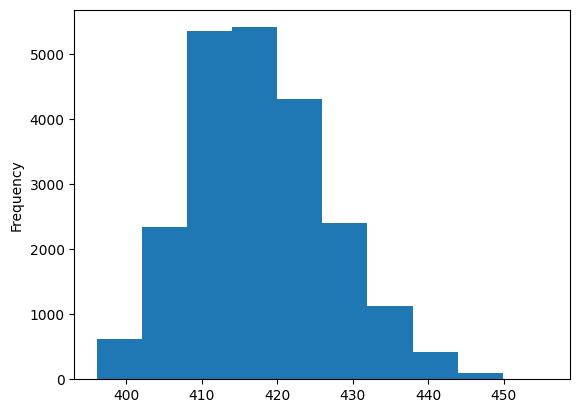

In [34]:
OP.plot.hist()

In [17]:
OP.describe()

count    22100.000000
mean       417.784973
std          9.135745
min        396.103455
25%        411.483215
50%        416.745560
75%        423.469444
max        455.866852
Name: 10 mA cm‐2 , dtype: float64

In [24]:
[i for i in (OP == 396.103455).values].index(True)

738

In [9]:
e = np.array(predictor.predict(df_mole_OP).values)

c:\Users\23174\anaconda3\envs\pytorch\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\23174\anaconda3\envs\pytorch\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [36]:
mean_value[feature_name_list]

,MagpieData mean GSmagmom,MagpieData mean SpaceGroupNumber,MagpieData avg_dev GSmagmom,MagpieData mean NValence,MagpieData avg_dev SpaceGroupNumber
0,1.071003,210.624781,0.611667,7.781104,12.842969


In [37]:
df.describe()[feature_name_list]

,MagpieData mean GSmagmom,MagpieData mean SpaceGroupNumber,MagpieData avg_dev GSmagmom,MagpieData mean NValence,MagpieData avg_dev SpaceGroupNumber
count,5330.000000,5330.000000,5330.000000,5330.000000,5330.000000
mean,1.071003,210.624781,0.611667,7.781104,12.842969
std,0.380923,7.809427,0.185906,1.043612,3.927678
min,0.100622,194.000000,0.000000,4.479000,0.000000
25%,0.790734,204.527888,0.488869,7.101216,10.745600
50%,1.070918,210.579681,0.623589,7.935850,14.286482
75%,1.351255,216.681000,0.746218,8.570131,15.818797
max,2.110663,229.000000,1.055331,10.000000,17.500000


In [15]:
featureSA.get_mean_feature_value()

0    1.071003
Name: MagpieData mean GSmagmom, dtype: float64

In [60]:
len(op_list)

255

In [27]:
op_list = []
import warnings
warnings.filterwarnings('ignore')
for i in np.arange(0, 3, 0.1):
    print(i)
    featureSA.change_feature_value(i)
    op_list.append(featureSA.get_predict_op_value())

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
1.3
1.4000000000000001
1.5
1.6
1.7000000000000002
1.8
1.9000000000000001
2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5
2.6
2.7
2.8000000000000003
2.9000000000000004


In [19]:
op_list

[0    415.428223
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.428375
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.428528
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.42868
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.428833
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.428986
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.429169
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.429352
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.429535
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.429718
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.429901
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.430054
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.430237
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.430389
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.430573
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.430725
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.430878
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.431061
 Name: 10 mA cm‐2 , dtype: float32,
 0    415.431213
 Name: 10 mA cm‐2 , dtype: flo

```python
d2l.plot([time, time[tau:], time[n_train + tau:]],
         [x.detach().numpy(), onestep_preds.detach().numpy(),
          multistep_preds[n_train + tau:].detach().numpy()], 'time',
         'x', legend=['data', '1-step preds', 'multistep preds'],
         xlim=[1, 1000], figsize=(6, 3))
```

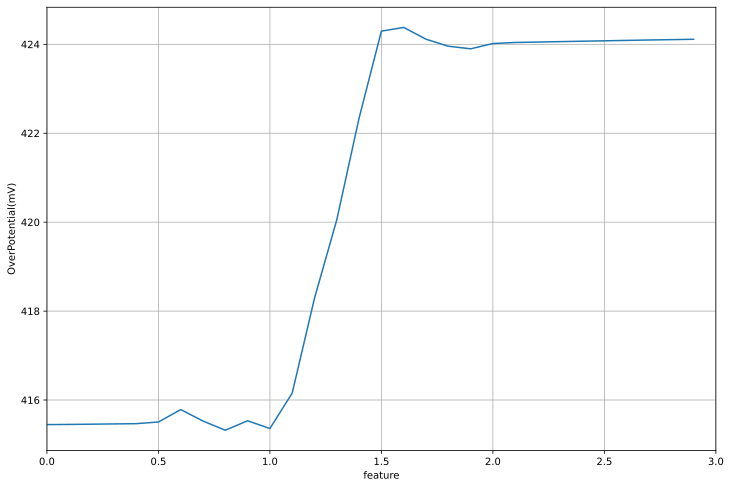

In [30]:
d2l.plot([np.arange(0, 3, 0.1), ], [op_list, ], 'feature',
         'OverPotential(mV)', legend=[],
         xlim=[0, 3], figsize=(12, 8))
plt.savefig("灵敏度分析", dpi=300)

In [41]:
mean_value.copy()['MagpieData mean GSmagmom']

0    1.071003
Name: MagpieData mean GSmagmom, dtype: float64

# 分析泛化数据
<img src="markdownimages/test.png" width = "50%" />

In [43]:
import plotly.figure_factory as ff
import numpy as np
test_Data = pd.DataFrame({"formula":['Co0.477Fe0.477Cu0.046', 'Co0.49Fe0.49Cu0.02', "Co0.484Fe0.484Cu0.032",
                          "Ni0.33Fe0.33Mo0.33", "Ni0.33Fe0.33W0.33", "Ni0.33Fe0.33Ta0.33", 
                          "Ni0.33Fe0.33Re0.33", "Ni0.33Fe0.33Nb0.33"]})
test_Data

,formula
0,Co0.477Fe0.477Cu0.046
1,Co0.49Fe0.49Cu0.02
2,Co0.484Fe0.484Cu0.032
3,Ni0.33Fe0.33Mo0.33
4,Ni0.33Fe0.33W0.33
5,Ni0.33Fe0.33Ta0.33
6,Ni0.33Fe0.33Re0.33
7,Ni0.33Fe0.33Nb0.33


In [44]:
from matminer.featurizers.conversions import StrToComposition
test_Data = StrToComposition().featurize_dataframe(test_Data, "formula")
test_Data.head()


StrToComposition:   0%|          | 0/8 [00:00<?, ?it/s]

,formula,composition
0,Co0.477Fe0.477Cu0.046,"(Co, Fe, Cu)"
1,Co0.49Fe0.49Cu0.02,"(Co, Fe, Cu)"
2,Co0.484Fe0.484Cu0.032,"(Co, Fe, Cu)"
3,Ni0.33Fe0.33Mo0.33,"(Ni, Fe, Mo)"
4,Ni0.33Fe0.33W0.33,"(Ni, Fe, W)"


In [45]:
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name="magpie")
test_Data = ep_feat.featurize_dataframe(test_Data, col_id="composition")  # input the "composition" column to the featurizer
test_Data.head()

ElementProperty:   0%|          | 0/8 [00:00<?, ?it/s]

,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Co0.477Fe0.477Cu0.046,"(Co, Fe, Cu)",26.0,29.0,3.0,26.615000,0.586710,26.0,55.0,64.0,...,2.110663,1.745407,0.348454,1.548471,194.0,229.0,35.0,212.121000,17.287434,194.0
1,Co0.49Fe0.49Cu0.02,"(Co, Fe, Cu)",26.0,29.0,3.0,26.550000,0.539000,26.0,55.0,64.0,...,2.110663,1.792976,0.311333,1.548471,194.0,229.0,35.0,211.770000,17.414600,194.0
2,Co0.484Fe0.484Cu0.032,"(Co, Fe, Cu)",26.0,29.0,3.0,26.580000,0.561440,26.0,55.0,64.0,...,2.110663,1.771021,0.328773,1.548471,194.0,229.0,35.0,211.932000,17.358176,194.0
3,Ni0.33Fe0.33Mo0.33,"(Ni, Fe, Mo)",26.0,42.0,16.0,32.000000,6.666667,26.0,50.0,61.0,...,2.110663,0.902019,0.805762,0.000000,225.0,229.0,4.0,227.666667,1.777778,225.0
4,Ni0.33Fe0.33W0.33,"(Ni, Fe, W)",26.0,74.0,48.0,42.666667,20.888889,26.0,51.0,61.0,...,2.110663,0.902019,0.805762,0.000000,225.0,229.0,4.0,227.666667,1.777778,225.0


In [46]:
test_Data = test_Data.drop(["formula"], axis=1)

In [47]:

op_value = predictor.predict(test_Data)
op_value

c:\Users\23174\anaconda3\envs\pytorch\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0    436.017456
1    437.507812
2    436.293884
3    417.442993
4    420.134521
5    419.976074
6    414.048584
7    417.608582
Name: 10 mA cm‐2 , dtype: float32